In [9]:
!curl -o mosquitodata.zip -L http://bit.ly/mosquitodata

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   168  100   168    0     0    778      0 --:--:-- --:--:-- --:--:--   796
curl: (77) error setting certificate verify locations:
  CAfile: /etc/pki/tls/certs/ca-bundle.crt
  CApath: none


In [11]:
ls *csv

A1_mosquito_data.csv  A3_mosquito_data.csv  B2_mosquito_data.csv
A2_mosquito_data.csv  B1_mosquito_data.csv


In [8]:
!unzip mosquitodata.zip

Archive:  mosquitodata
  inflating: B2_mosquito_data.csv    
  inflating: B1_mosquito_data.csv    
  inflating: A3_mosquito_data.csv    
  inflating: A2_mosquito_data.csv    
  inflating: A1_mosquito_data.csv    


In [12]:
!head A1_mosquito_data.csv

year,temperature,rainfall,mosquitos
2001,80,157,150
2002,85,252,217
2003,86,154,153
2004,87,159,158
2005,74,292,243
2006,75,283,237
2007,80,214,190
2008,85,197,181
2009,74,231,200


In [13]:
import pandas

In [14]:
!pwd

/home/zonca


In [16]:
pandas.read_csv("A1_mosquito_data.csv", sep=",")

,year,temperature,rainfall,mosquitos
0,2001,80,157,150
1,2002,85,252,217
2,2003,86,154,153
3,2004,87,159,158
4,2005,74,292,243
5,2006,75,283,237
6,2007,80,214,190
7,2008,85,197,181
8,2009,74,231,200
9,2010,74,207,184


In [17]:
data = pandas.read_csv("A1_mosquito_data.csv", sep=",")

In [18]:
type(data)

pandas.core.frame.DataFrame

In [19]:
data

,year,temperature,rainfall,mosquitos
0,2001,80,157,150
1,2002,85,252,217
2,2003,86,154,153
3,2004,87,159,158
4,2005,74,292,243
5,2006,75,283,237
6,2007,80,214,190
7,2008,85,197,181
8,2009,74,231,200
9,2010,74,207,184


In [20]:
data["temperature"]

0    80
1    85
2    86
3    87
4    74
5    75
6    80
7    85
8    74
9    74
Name: temperature, dtype: int64

In [21]:
data.columns

Index(['year', 'temperature', 'rainfall', 'mosquitos'], dtype='object')

In [29]:
data.ix[1]["mosquitos"]

217

In [32]:
data = data.set_index("year")

In [34]:
data.ix[2006:2009]["temperature"]

year
2006    75
2007    80
2008    85
2009    74
Name: temperature, dtype: int64

In [35]:
data.index

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], dtype='int64', name='year')

In [36]:
data["mosquitos"][data["temperature"] > 75]

year
2001    150
2002    217
2003    153
2004    158
2007    190
2008    181
Name: mosquitos, dtype: int64

## Challenge

Print mosquitos number between 05 and 08 when temperature is less than 75

In [37]:
data["mosquitos"][data["temperature"] < 75].ix[2005:2008]

year
2005    243
Name: mosquitos, dtype: int64

In [39]:
columns_to_print = ["temperature", "mosquitos"]
data[columns_to_print]

,temperature,mosquitos
year,,
2001,80,150
2002,85,217
2003,86,153
2004,87,158
2005,74,243
2006,75,237
2007,80,190
2008,85,181
2009,74,200


In [40]:
data.mean()

temperature     80.0
rainfall       214.6
mosquitos      191.3
dtype: float64

In [41]:
data.max()

temperature     87
rainfall       292
mosquitos      243
dtype: int64

In [42]:
data.min()

temperature     74
rainfall       154
mosquitos      150
dtype: int64

## Challenge

print mean of just weather data for `A2_moquito_data.csv`

In [43]:
pandas.read_csv("A2_mosquito_data.csv",         
        sep=",").set_index("year")[["rainfall", "temperature"]].mean()

rainfall       207.039216
temperature     80.392157
dtype: float64

In [44]:
%matplotlib inline

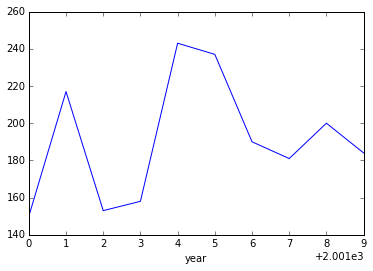

In [45]:
data["mosquitos"].plot()

In [46]:
import matplotlib.pyplot as plt

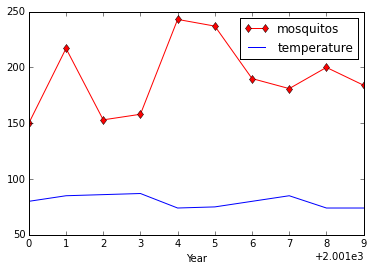

In [56]:
plt.plot(data.index, data["mosquitos"], marker="d", 
         color="red", label="mosquitos")
plt.plot(data.index, data["temperature"], label="temperature")
plt.legend()
plt.xlabel("Year")

In [57]:
import pandas as pd

In [58]:
data = pd.read_csv("A2_mosquito_data.csv")

In [59]:
data.head()

,year,temperature,rainfall,mosquitos
0,1960,82,200,180
1,1961,70,227,194
2,1962,89,231,207
3,1963,74,114,121
4,1964,78,147,140


In [60]:
len(data)

51

In [61]:
data = data.set_index("year")

In [62]:
data.head()

,temperature,rainfall,mosquitos
year,,,
1960,82,200,180
1961,70,227,194
1962,89,231,207
1963,74,114,121
1964,78,147,140


In [63]:
data["temperature"] = (data["temperature"]  -32) * 5 / 9.0

In [65]:
data.head()

,temperature,rainfall,mosquitos
year,,,
1960,27.777778,200,180
1961,21.111111,227,194
1962,31.666667,231,207
1963,23.333333,114,121
1964,25.555556,147,140


In [ ]:
len()

In [66]:
def fahr_to_celsius(temp_F):
    """Convert Fahrenheit to Celsius
    
    Convert input data to Celsius
    """
    temp_C = (temp_F  -32) * 5 / 9.0
    return temp_C

In [77]:
temp_C

NameError: name 'temp_C' is not defined

In [67]:
fahr_to_celsius(3)

-16.11111111111111

In [68]:
fahr_to_celsius(212)

100.0

In [69]:
data = pd.read_csv("A2_mosquito_data.csv")

In [72]:
fahr_to_celsius(data["temperature"]).head()

0    27.777778
1    21.111111
2    31.666667
3    23.333333
4    25.555556
Name: temperature, dtype: float64

In [73]:
data["temperature"].head()

0    82
1    70
2    89
3    74
4    78
Name: temperature, dtype: int64

In [76]:
fahr_to_celsius?

In [78]:
import statsmodels.api as sm

In [90]:
regr_result = sm.OLS.from_formula('mosquitos ~ rainfall', data).fit()

In [91]:
parameters = regr_result.params

In [92]:
line_fit = parameters["Intercept"] + \
            parameters["rainfall"] * data["rainfall"]

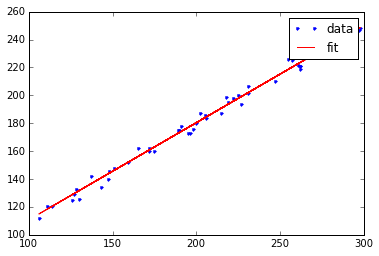

In [93]:
plt.plot(data["rainfall"], data["mosquitos"], ".", label="data")
plt.plot(data["rainfall"], line_fit, color="r", label="fit")
plt.legend()

In [94]:
regr_result.rsquared

0.99131593546068497

Intercept    41.159816
rainfall      0.695885
dtype: float64

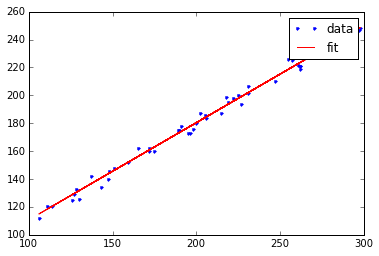

In [101]:
def analyze(mosquito_data):
    """Fit and plot mosquito data
    
    Run a linear fit between rainfall and mosquito
    plot the result"""
    regr_result = sm.OLS.from_formula('mosquitos ~ rainfall', 
                                      mosquito_data).fit()
    parameters = regr_result.params
    line_fit = parameters["Intercept"] + \
            parameters["rainfall"] * mosquito_data["rainfall"]
    plt.plot(mosquito_data["rainfall"], mosquito_data["mosquitos"],
             ".", label="data")
    plt.plot(mosquito_data["rainfall"], line_fit, color="r", label="fit")
    plt.legend()
    return parameters
        
analyze(data)

In [102]:
ls *csv

A1_mosquito_data.csv  A3_mosquito_data.csv  B2_mosquito_data.csv
A2_mosquito_data.csv  B1_mosquito_data.csv


In [103]:
data_B2 = pd.read_csv("B2_mosquito_data.csv", index_col="year")

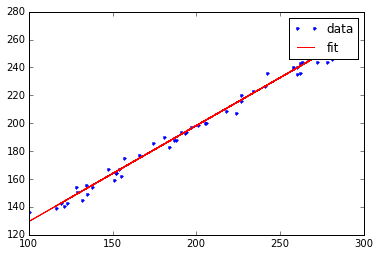

In [105]:
parameters_B2 = analyze(data_B2)